# 感知机(Perceptron)

感知机（Perceptron）是一种基本的人工神经网络模型，由弗兰克·罗森布拉特（Frank Rosenblatt）于1958年提出。它是机器学习领域的一种线性分类模型，用于解决二分类问题。感知机的核心思想是通过学习找到一个线性分割超平面，将样本划分为两个类别。

## 感知机的基本概念

1. **输入与权重**
感知机接收一个输入向量  $x = (x_1, x_2, \ldots, x_n) $，每个输入特征对应一个权重  $w = (w_1, w_2, \ldots, w_n)$ 。感知器的输入向量也可以理解为信号的输入。


输入维度  $n$  决定了超平面的维度：

*  如果  $n = 2$ ，决策边界是二维平面上的一条直线。
*  如果  $n = 3$ ，决策边界是三维空间中的一个平面。
*  如果  $n > 3$ ，决策边界是  $n$ -维空间中的一个超平面。


2. **加权求和**
感知机将输入向量与权重向量相乘并求和，加上一个偏置  $b$ ：

    $z = \sum_{i=1}^n w_i x_i + b$

3. **激活函数**
使用符号函数（Sign Function）将加权求和的结果转换为分类结果：
$$
y =
\begin{cases}
1 & \text{if } z \leq 0 \\
-1 & \text{if } z > 0
\end{cases}
$$
这里  $y$  是感知机的输出，也可以理解为信号的输出。

$w = (w_1, w_2, \ldots, w_n)$是控制输入信号的重要性的参数，而偏置是调整神经元被激活的容易程度（感知器输出为1的程度）。比如，若$b$为-0.1，则只要输入信号的加权总和超过0.1，神经元就会被激活。但是如果$b$为-20，则输入信号的加权总和必须超过20.0，神经元才会被激活。偏置  $b$ 的值决定了神经元被激活的容易程度。

在神经网络中，偏置（Bias）是指在神经元计算输出时加上的一个额外的可训练参数，它不依赖于输入特征，而是相当于为神经元的输入加上一个“基准值”或“截距项”（intercept）。偏置的主要作用包括以下几个方面：

1. 增加模型的灵活性和表达能力：

若没有偏置，神经元的输出将严格受限于输入与权重的线性组合在原点(0,0,…,0)处通过。换句话说，神经网络中的每个激活函数曲线都将只能围绕原点变化，这会严重限制模型拟合数据的能力。
添加偏置项后，神经元输出不再被迫通过原点，从而可以灵活地将激活函数向上或向下平移，使网络在表示更复杂的函数时更为灵活。

2. 帮助模型更好地拟合数据：

偏置项使得网络能适应数据中存在的非零均值分布。如果网络没有偏置，当输入数据的均值不是零时，单纯靠权重与输入的线性组合很难有效捕捉数据的真实分布，加上偏置后，网络能更方便地调整输出值，使之更好地贴合数据特征。

3. 促进对称性打破，避免恒为零的梯度或无效权重更新：

在训练开始时，如果没有偏置且初始权重对称，网络的多个神经元可能学到完全相同的映射模式，导致冗余和学习效率低下；偏置有助于打破这种对称，使各个神经元能学习到不同的特征，提高网络的判别能力和训练速度。


## 使用感知机模拟逻辑门

In [7]:
import numpy as np

# 定义感知机函数
def AND(x):
    weights = np.array([0.5, 0.5])  # w1 和 w2
    bias = -0.7                     # 偏置 b
    tmp = np.dot(weights, x) + bias
    return 1 if tmp > 0 else 0

# 定义逻辑 AND 门的输入和期望输出
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
    
expected_outputs = np.array([0, 0, 0, 1])  # AND 门的期望输出

print("AND")
print("输入\t\t感知机输出\t期望输出")
for i, input_vector in enumerate(inputs):
    output = AND(input_vector)
    print(f"{input_vector}\t\t{output}\t\t{expected_outputs[i]}")
print("-------------------------------------------------")    


# 逻辑或
def OR(x):
    weights = np.array([1, 1])  
    bias = -0.5   
    z = np.dot(weights, x) + bias  # z = w1*x1 + w2*x2 + b
    return 1 if z >= 0 else 0      # 

# 定义逻辑 OR 门的输入和期望输出
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

expected_outputs = np.array([0, 1, 1, 1])  # OR 门的期望输出

print("OR")
print("输入\t\t感知机输出\t期望输出")
for i, input_vector in enumerate(inputs):
    output = OR(input_vector)
    print(f"{input_vector}\t\t{output}\t\t{expected_outputs[i]}")

# 非门 NOT(AND(x))
# 逻辑非门 (NAND)
print("-------------------------------------------------")   
def NAND(x):
    weights = np.array([-1, -1])  
    bias = 1.5                   
    z = np.dot(weights, x) + bias  
    return 1 if z >= 0 else 0      

inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

expected_outputs = np.array([1, 1, 1, 0])  # NAND 门的期望输出

# 测试 NAND 门
print("NAND")
print("输入\t\t感知机输出\t期望输出")
for i, input_vector in enumerate(inputs):
    output = NAND(input_vector)
    print(f"{input_vector}\t\t{output}\t\t{expected_outputs[i]}")

AND
输入		感知机输出	期望输出
[0 0]		0		0
[0 1]		0		0
[1 0]		0		0
[1 1]		1		1
-------------------------------------------------
OR
输入		感知机输出	期望输出
[0 0]		0		0
[0 1]		1		1
[1 0]		1		1
[1 1]		1		1
-------------------------------------------------
NAND
输入		感知机输出	期望输出
[0 0]		1		1
[0 1]		1		1
[1 0]		1		1
[1 1]		0		0


## 感知机的局限性
感知机可以实现与门、与非门、或门三种逻辑电路。但不能实现异或门，原因是感知机的局限性只能表示由一条直线分隔的空间，但是无法表示弯曲的曲线所分割的空间。

我们在二维空间画出表示**或门**的感知机的直线，这条直线分割开两个空间，其中白色空间输出1，蓝色阴影空间输出0

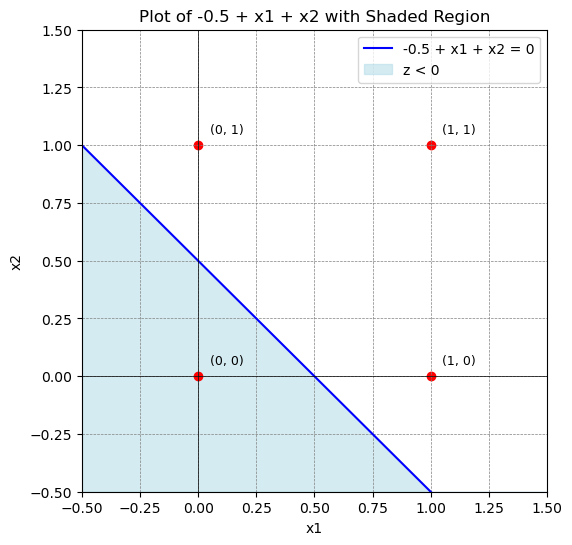

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# 定义直线的参数：z = -0.5 + x1 + x2
def line_x2(x1):
    return -x1 + 0.5

# 定义四个点
points = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 绘图
x = np.linspace(-0.5, 1.5, 100)  # x1 的范围
y = line_x2(x)  # 计算直线上的 x2

plt.figure(figsize=(6, 6))

# 绘制直线
plt.plot(x, y, label="-0.5 + x1 + x2 = 0", color="blue")

# 填充直线下方的区域
plt.fill_between(x, y, -0.5, color="lightblue", alpha=0.5, label="z < 0")

# 绘制点
for point in points:
    plt.scatter(point[0], point[1], color="red")
    plt.text(point[0] + 0.05, point[1] + 0.05, f"({point[0]}, {point[1]})", fontsize=9)

# 设置坐标轴范围
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

# 添加网格、标签和图例
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Plot of -0.5 + x1 + x2 with Shaded Region")

# 显示图像
plt.show()

或门在$(x1,x2)=(0,0)$时输出0，在$(x1,x2)=(0,1), (1,0), (1,1)$时输出为1。如果想利用感知机制作或门，只需使得感知器分割的两个空间，各自包含所有的绿色三角形和所有的红色圆形即可。上图实现了或门，但是对于异或门，不能通过一条直线分割两个平面得到，下图显示了异或门的空间示意图。

/var/folders/n7/h8vtfbcn3cn8b86gk1fgql700000gn/T/ipykernel_2177/836208780.py:16: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  paths = contours.collections[0].get_paths()


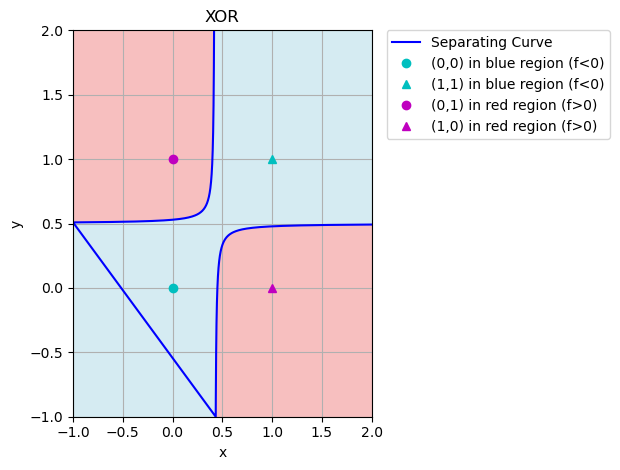

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# 定义隐式函数
def f(x, y):
    return (y - x)**2 - (y + x - 1)**2 + 0.1 - 0.3*y

# 创建网格，用于绘制隐式曲线
x = np.linspace(-1, 2, 800)  # Range from -1 to 2
y = np.linspace(-1, 2, 800)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制等值线 f(x,y)=0 (分割平面的曲线)
contours = plt.contour(X, Y, Z, levels=[0], colors='blue', linewidths=2)
paths = contours.collections[0].get_paths()

# 从可能的多条等高线中选择一条最长的作为主分支曲线
max_len = 0
main_path = None
for path in paths:
    v = path.vertices
    length = np.sum(np.sqrt(np.sum(np.diff(v, axis=0)**2, axis=1)))
    if length > max_len:
        max_len = length
        main_path = v

plt.clf()  # Clear the current figure and redraw

# 绘制填充区域，f<0用浅蓝色，f>0用浅红色
plt.contourf(X, Y, Z, levels=[-np.inf, 0, np.inf], colors=['lightblue','lightcoral'], alpha=0.5)

# 绘制主分支曲线
plt.plot(main_path[:,0], main_path[:,1], 'b-', label='Separating Curve')

# 绘制四个特殊点，并标注它们所在区域
plt.plot(0, 0, 'co', label='(0,0) in blue region (f<0)')
plt.plot(1, 1, 'c^', label='(1,1) in blue region (f<0)')
plt.plot(0, 1, 'mo', label='(0,1) in red region (f>0)')
plt.plot(1, 0, 'm^', label='(1,0) in red region (f>0)')

# 调整图例位置，不遮挡关键点。
# 将图例放在右侧空白区域（例如使用 bbox_to_anchor 将图例放在绘图外部）
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('XOR')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# 扩大显示范围，避免图例和坐标点重叠
plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.tight_layout()  # Optimize layout for legend placement outside the plot
plt.show()

## 多层感知机
单层感知机只能解决线性可分问题，对于线性不可分问题无法解决。但是感知机的绝妙之处在于其可以进行叠加，即多层感知机（MLP，Multi-Layer Perceptron），引入了隐藏层和非线性激活函数，从而能够处理非线性问题。

使用之前的AND函数、NAND函数、OR函数进行XOR函数的实现。


In [120]:
# Re-import necessary libraries after environment reset
import numpy as np

# 定义 XOR 函数
def XOR(x):
    s1 = NAND(x)  # Step 1: Calculate NAND
    s2 = OR(x)    # Step 2: Calculate OR
    y = AND([s1, s2])  # Step 3: Combine results with AND
    return y

# # 定义 NAND 函数
# def NAND(x):
#     weights = np.array([-1, -1])  
#     bias = 1.5                   
#     z = np.dot(weights, x) + bias  
#     return 1 if z >= 0 else 0      

# # 定义 OR 函数
# def OR(x):
#     weights = np.array([1, 1])  
#     bias = -0.5   
#     z = np.dot(weights, x) + bias  
#     return 1 if z >= 0 else 0      

# # 定义 AND 函数
# def AND(x):
#     weights = np.array([0.5, 0.5])  
#     bias = -0.7                     
#     z = np.dot(weights, x) + bias
#     return 1 if z > 0 else 0

# 测试 XOR 函数
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

expected_outputs = np.array([0, 1, 1, 0])  # XOR 门的期望输出

print("XOR")
print("输入\t\t感知机输出\t期望输出")
for i, input_vector in enumerate(inputs):
    output = XOR(input_vector)
    print(f"{input_vector}\t\t{output}\t\t{expected_outputs[i]}")

XOR
输入		感知机输出	期望输出
[0 0]		0		0
[0 1]		1		1
[1 0]		1		1
[1 1]		0		0


异或门是一种多层结构的神经网络，可以用下图来表示，下图是一个简单的两层神经网络示意图：

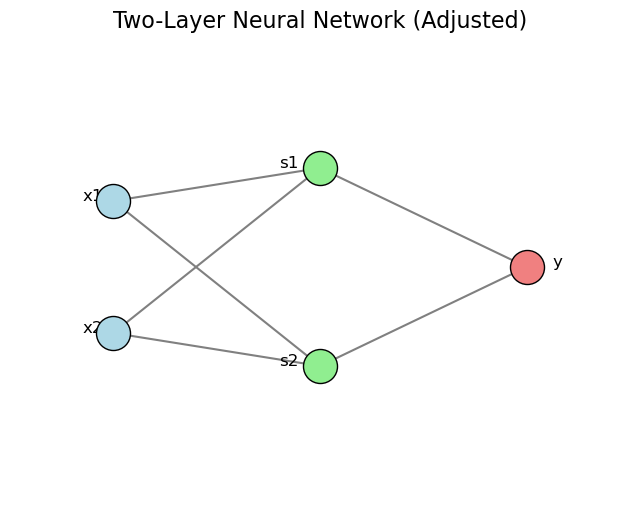

In [124]:
def draw_neural_network_adjusted():
    fig, ax = plt.subplots(figsize=(8, 6))

    # 定义节点位置
    layer_0 = [(0, 0.7), (0, 0.3)]  # x1, x2
    layer_1 = [(2, 0.8), (2, 0.2)]  # s1, s2
    layer_2 = [(4, 0.5)]  # y

    # 绘制第0层 (输入层 x)
    for i, (x, y) in enumerate(layer_0):
        ax.scatter(x, y, s=600, color='lightblue', edgecolor='black', zorder=5)
        ax.text(x - 0.2, y, f"x{i+1}", fontsize=12, ha='center')

    # 绘制第1层 (隐藏层 s)
    for i, (x, y) in enumerate(layer_1):
        ax.scatter(x, y, s=600, color='lightgreen', edgecolor='black', zorder=5)
        ax.text(x - 0.3, y, f"s{i+1}", fontsize=12, ha='center')

    # 绘制第2层 (输出层 y)
    for x, y in layer_2:
        ax.scatter(x, y, s=600, color='lightcoral', edgecolor='black', zorder=5)
        ax.text(x + 0.3, y, "y", fontsize=12, ha='center')

    # 连接第0层与第1层
    for x1, y1 in layer_0:
        for x2, y2 in layer_1:
            ax.plot([x1, x2], [y1, y2], color='gray', linestyle='-', zorder=1)

    # 连接第1层与第2层
    for x1, y1 in layer_1:
        for x2, y2 in layer_2:
            ax.plot([x1, x2], [y1, y2], color='gray', linestyle='-', zorder=1)

    # 设置坐标范围
    ax.set_xlim(-1, 5)
    ax.set_ylim(-0.2, 1.2)

    # 去除坐标轴
    ax.axis('off')
    plt.title("Two-Layer Neural Network (Adjusted)", fontsize=16)
    plt.show()

# 调用绘图函数
draw_neural_network_adjusted()

* 第0层 (输入层)：包含两个节点，分别表示  $x_1$  和  $x_2$ 。
* 第1层 (隐藏层)：包含两个个节点，分别表示  $s_1$, $s_2$ 。
* 第2层 (输出层)：包含一个节点，表示输出  $y$ 。

1. 第0层的两个神经元接收输入信号，并将信号发送至第1层的神经元。
2. 第1层的神经元将信号发送至第2层的神经元，第2层的神经元输出$y$。

这种2层感知机的运行过程可以比作流水线的组装作业。第1段（第1层）的工人对传送过来的零件进行加工，完成后再传送给第2段（第2层）的工人。第2层的工人对第1层的工人传过来的零件进行加工，完成这个零件后出货 （输出）。